In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
anime_csv = "Resources/anime.csv"

In [3]:
# Read with Pandas
anime_df = pd.read_csv(anime_csv)
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,1-Sep-01,Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27


In [4]:
# Getting certain anime information
random_anime = anime_df.iloc[[833, 9117, 9, 9399, 2730,11483, 3902, 368, 6146, 9002 ,9399 ,7600, 10602 ,6476 ,9117,6106,]]
random_anime


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
833,833,Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama,銀魂,TV,201,"Apr 4, 2006 to Mar 25, 2010",Spring 2006,...,108448,74869,52666,27675,11208,6423,2934,1299,850,2743
9117,9117,MHA,8.11,"Action, Comedy, School, Shounen, Super Power",My Hero Academia,僕のヒーローアカデミア,TV,13,"Apr 3, 2016 to Jun 26, 2016",Spring 2016,...,192539,318675,414913,253871,77961,29893,9015,3664,1807,3129
9,9,Monster,8.76,"Drama, Horror, Mystery, Police, Psychological,...",Monster,モンスター,TV,74,"Apr 7, 2004 to Sep 28, 2005",Spring 2004,...,77350,60652,43459,22045,8861,4381,2086,882,593,1177
9399,9399,Bungou Stray Dogs,8.20,"Action, Mystery, Seinen, Super Power, Supernat...",Bungo Stray Dogs 2,文豪ストレイドッグス,TV,12,"Oct 6, 2016 to Dec 16, 2016",Fall 2016,...,40625,70573,95530,46770,12876,4483,1372,424,201,205
2730,2730,Lupin III,6.86,"Action, Adventure, Mystery, Comedy, Seinen",Lupin III:Elusiveness of the Fog,ルパン三世 霧のエリューシヴ,Special,1,27-Jul-07,Unknown,...,85,134,389,593,359,169,60,25,13,9
11483,11483,Ex-Arm,2.18,"Action, Sci-Fi, Ecchi, Seinen",Unknown,EX-ARMエクスアーム,TV,12,"Jan 11, 2021 to ?",Winter 2021,...,1155,56,51,153,187,235,406,773,2014,15346
3902,3902,FMAB,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,714811,401507,199160,70045,20210,9308,3222,1536,2162,16806
368,368,Yuu☆Yuu☆Hakusho,8.45,"Action, Comedy, Demons, Supernatural, Martial ...",Yu Yu Hakusho:Ghost Files,幽☆遊☆白書,TV,112,"Oct 10, 1992 to Jan 7, 1995",Fall 1992,...,53772,64137,67564,35884,10733,3923,1089,424,186,509
6146,6146,SAO,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,TV,25,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,...,241049,236672,305386,303813,188431,124819,81155,44204,25371,23472
9002,9002,Kokuhaku,2.30,Horror,Unknown,コクハク,ONA,1,27-Aug-15,Unknown,...,115,13,9,26,46,120,126,194,557,1716


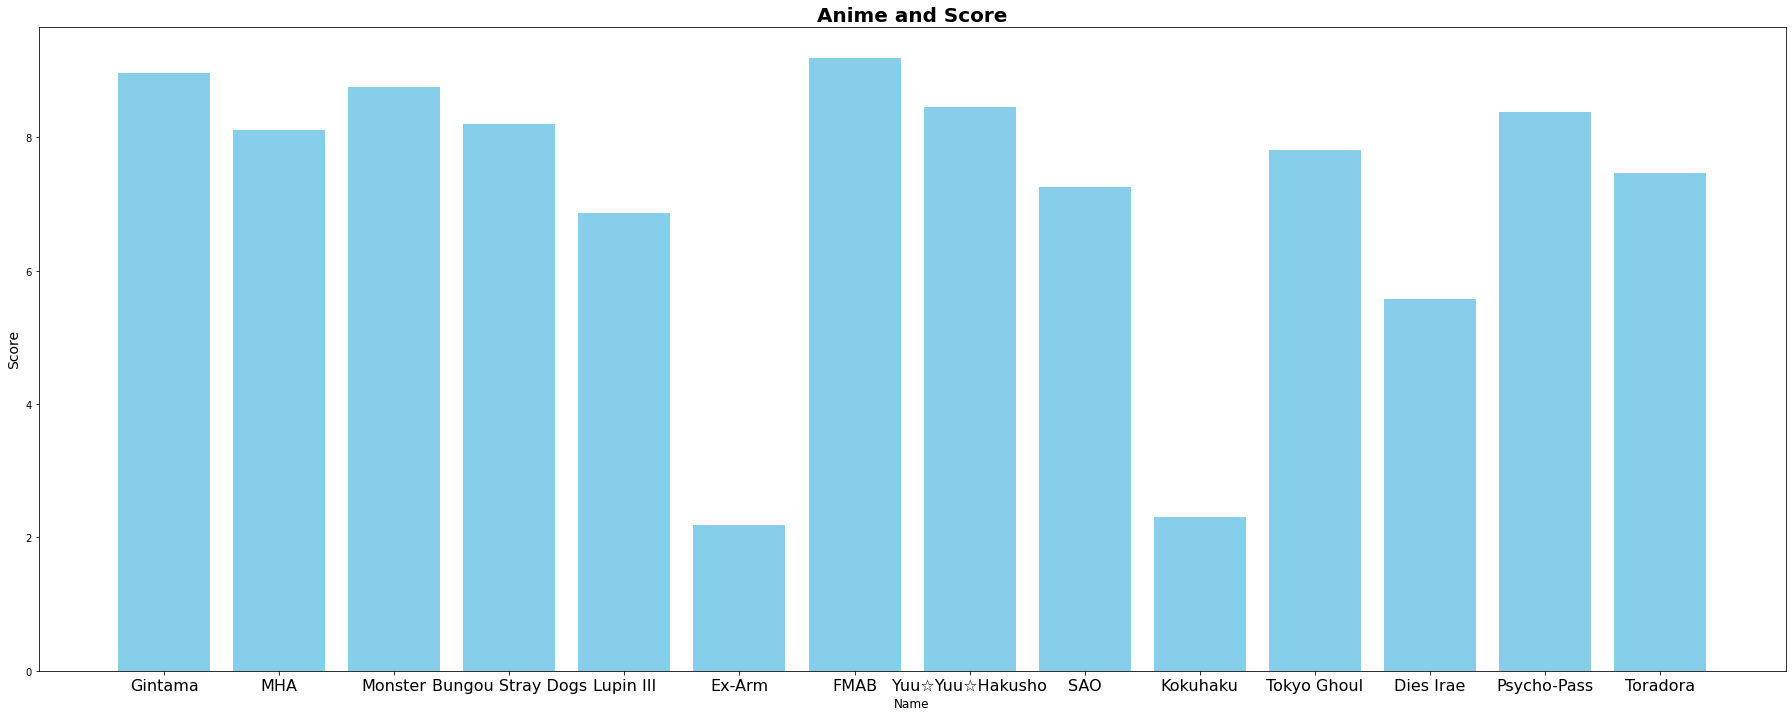

In [5]:
plt.figure(figsize=(25,10))
plt.bar(random_anime['Name'],random_anime['Score'], color="skyblue")

plt.title("Anime and Score", fontsize=20, fontweight="bold")
plt.xlabel("Name", fontsize=12)
plt.ylabel("Score", fontsize=14)
plt.tight_layout()
plt.xticks(fontsize=16)
plt.savefig("images/anime_and_score.png")
plt.show()

<AxesSubplot:title={'center':'TV_vs_Movie '}, ylabel='Type'>

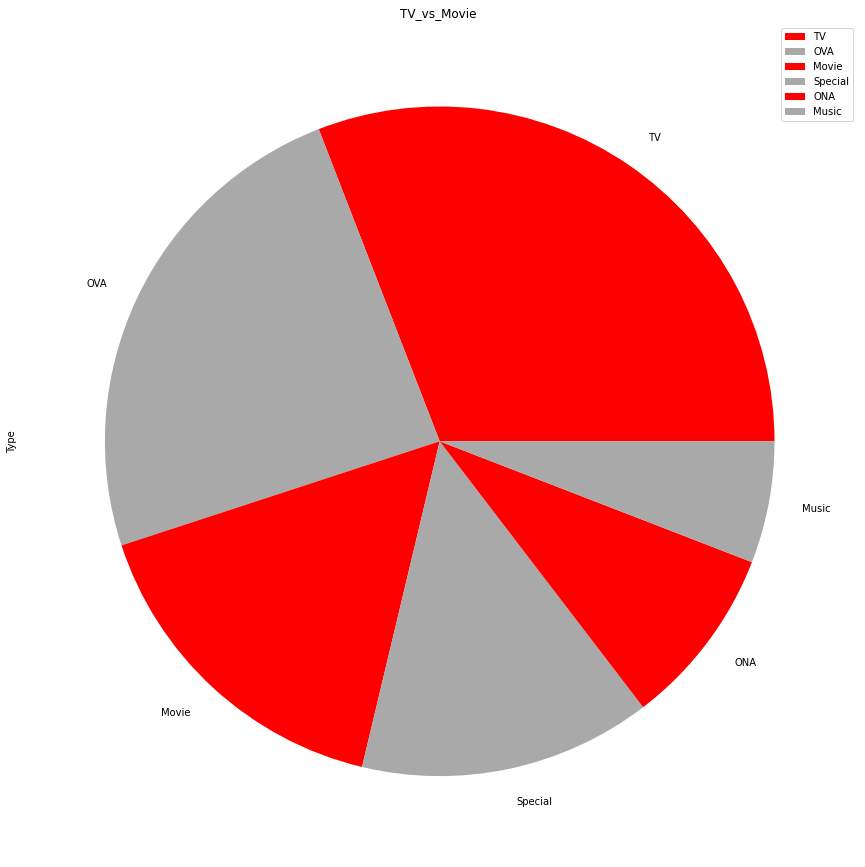

In [6]:
TV_vs_Movie = anime_df.loc[:,['Name','Type']].drop_duplicates()
colors = ["red", "darkgrey"]
Types_counts = pd.DataFrame(TV_vs_Movie.Type.value_counts())
plot = Types_counts.plot.pie(y="Type",figsize=(15,20),title="TV_vs_Movie ",colors = colors)
plt.savefig("images/tV_vs_movie.png")
plot

<AxesSubplot:title={'center':'Source_anime '}, ylabel='Source'>

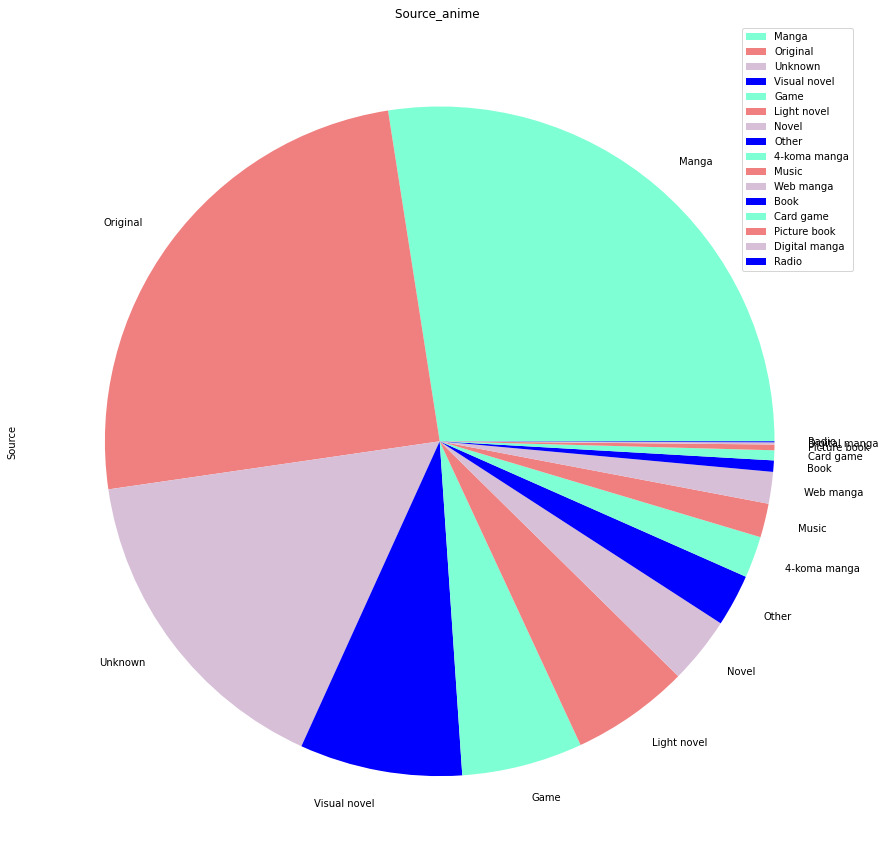

In [7]:
Source_anime = anime_df.loc[:,['Name','Source']].drop_duplicates()
colors = ["aquamarine", "lightcoral","Thistle", "blue"]
Types_counts = pd.DataFrame(Source_anime.Source.value_counts())
plot = Types_counts.plot.pie(y="Source",figsize=(15,100),title="Source_anime ",colors = colors)
plt.savefig("images/source_anime.png")
plot

In [32]:
# Prepare Data
source_df = anime_df[['Name', 'Source']].groupby('Source').apply(lambda x: x.mean())
source_df.sort_values('Name', inplace=True)
source_df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=source_df.index, ymin=0, ymax=source_df.Name, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(source_df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(source_df.index, source_df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

<ipython-input-32-388cd96982d8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  source_df = anime_df[['Name', 'Source']].groupby('Source').apply(lambda x: x.mean())


KeyError: 'Name'

<AxesSubplot:title={'center':'Anime_rating '}, ylabel='Rating'>

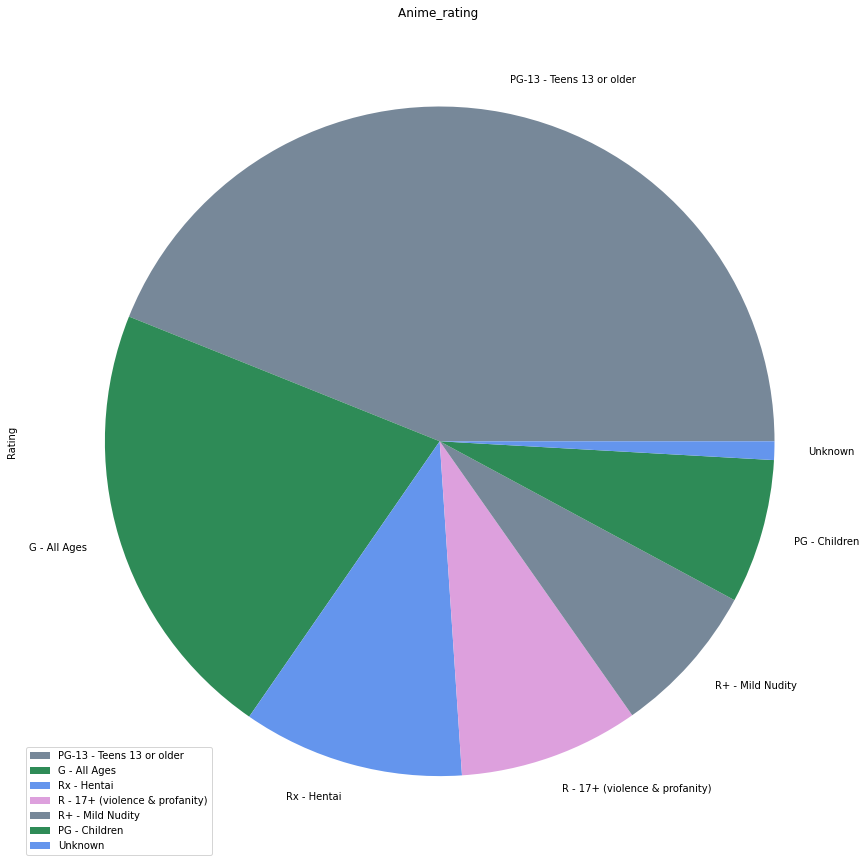

In [8]:
Anime_rating = anime_df.loc[:,['Name','Rating']].drop_duplicates()
colors = ["lightslategrey", "seagreen", "Cornflowerblue", "Plum"]
Types_counts = pd.DataFrame(Anime_rating.Rating.value_counts())
plot = Types_counts.plot.pie(y="Rating",figsize=(15,20),title="Anime_rating ",colors = colors)
plt.savefig("images/Anime_rating.png")
plot

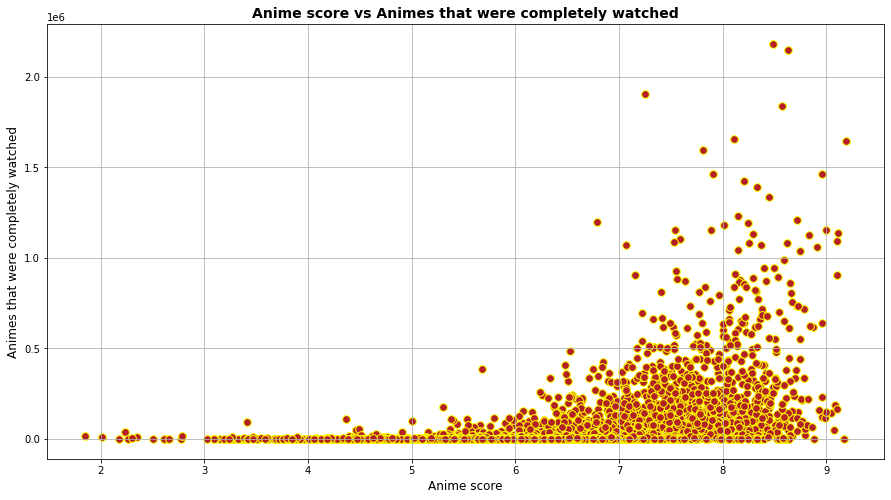

In [9]:
plt.figure(figsize=(15,8))
plt.scatter(anime_df.Score,anime_df.Completed,edgecolor="yellow",facecolor="firebrick",s=60)
plt.title("Anime score vs Animes that were completely watched",fontweight='heavy',fontsize=14)
plt.xlabel("Anime score",fontsize=12, fontweight='light')
plt.ylabel("Animes that were completely watched",fontsize=12,fontweight='light')
plt.grid()
plt.savefig("images/anime_score_vs_animes_that_were_completely_watched.png")
plt.show()

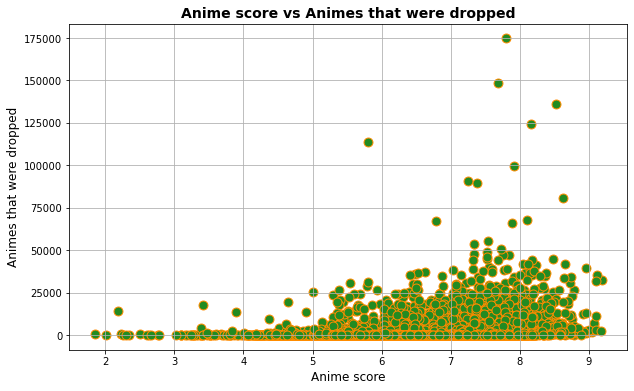

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(anime_df.Score,anime_df.Dropped,edgecolor="darkorange",facecolor="forestgreen",s=80)
plt.title("Anime score vs Animes that were dropped",fontweight='heavy',fontsize=14)
plt.xlabel("Anime score",fontsize=12, fontweight='light')
plt.ylabel("Animes that were dropped",fontsize=12,fontweight='light')
plt.grid()
plt.savefig("images/anime_score_vs_animes_that_were_dropped.png")
plt.show()

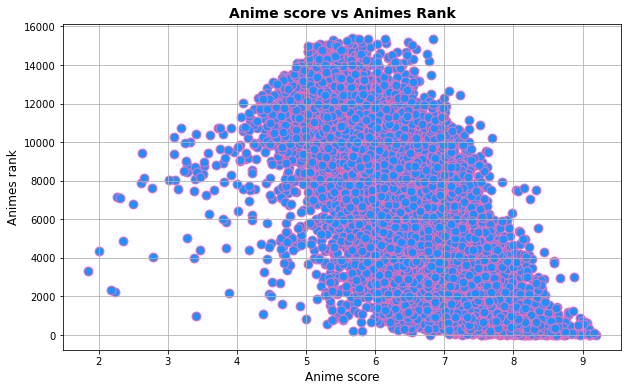

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(anime_df.Score,anime_df.Popularity,edgecolor="hotpink",facecolor="dodgerblue",s=80)
plt.title("Anime score vs Animes Rank",fontweight='heavy',fontsize=14)
plt.xlabel("Anime score",fontsize=12, fontweight='light')
plt.ylabel("Animes rank",fontsize=12,fontweight='light')
plt.grid()
plt.savefig("images/anime_score_vs_animes_rank.png")
plt.show()

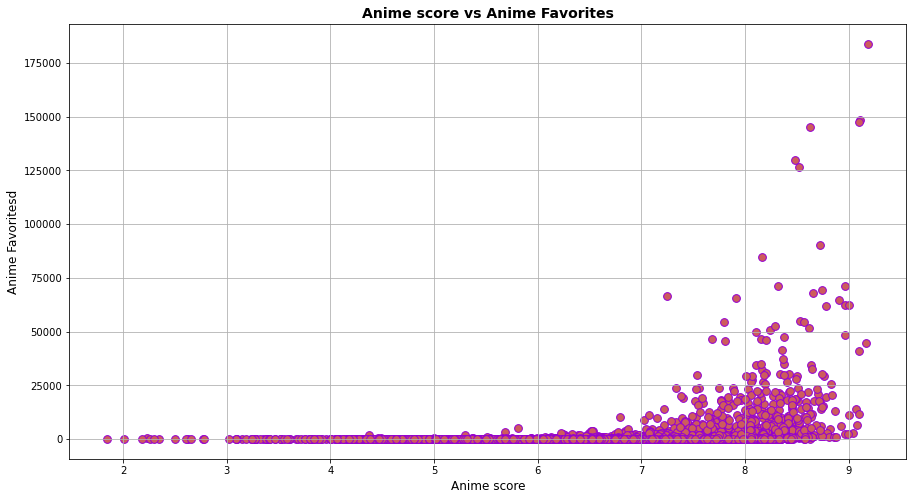

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(anime_df.Score,anime_df.Favorites,edgecolor="darkviolet",facecolor="indianred",s=60)
plt.title("Anime score vs Anime Favorites",fontweight='heavy',fontsize=14)
plt.xlabel("Anime score",fontsize=12, fontweight='light')
plt.ylabel("Anime Favoritesd",fontsize=12,fontweight='light')
plt.grid()
plt.savefig("images/anime_score_vs_anime_favorites.png")
plt.show()

In [13]:
x_values = anime_df['Score']
y_values = anime_df['Popularity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(50,50))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="pink",s=80)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.title("Score vs Popularity",fontweight='bold',fontsize=16)
plt.xlabel('Score',fontsize=12)
plt.ylabel('Popularity',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("images/Score vs Popularity of Anime.png")
plt.show()

The r-squared is: 0.48237978800108317


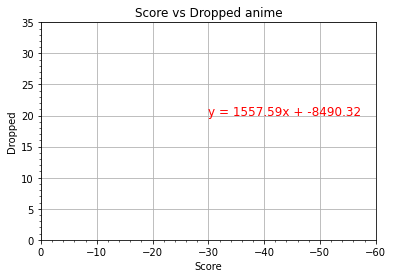

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = anime_df['Score']
y_values = anime_df['Dropped']

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="pink",s=80)
plt.title('Score vs Dropped anime')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Score')
plt.ylabel('Dropped')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid()
#plt.tight_layout()
plt.show()
plt.savefig("images/score_vs_dropped_anime.png")